In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/fake_jobs.csv")
print("The data in the file is :\n")
print(df)


The data in the file is :

    title_length  description_length  has_company_profile is_fake
0             72                 740                    1     yes
1             95                 476                    0      no
2             60                 662                    1     yes
3             34                 317                    0      no
4             67                 884                    0     yes
..           ...                 ...                  ...     ...
95            21                 416                    1     yes
96            59                 193                    0     yes
97            44                 934                    0     yes
98            42                 118                    1      no
99            42                 148                    0     yes

[100 rows x 4 columns]


In [5]:
# Convert 'yes'/'no' in target column to binary values
df['is_fake'] = df['is_fake'].map({'yes': 1, 'no': 0})

# Define features and target
X = df.drop('is_fake', axis=1)
y = df['is_fake']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

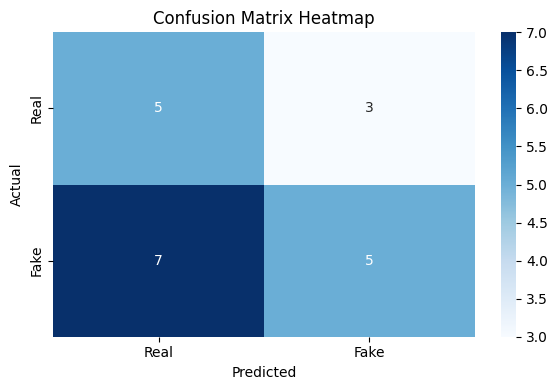

In [7]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


In [8]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [9]:
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", report)

Accuracy: 0.5
Precision: 0.625
Recall: 0.4166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.62      0.42      0.50        12

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.50        20
weighted avg       0.54      0.50      0.50        20

